# Task: 1 (Data Cleaning)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

### Importing Dataset

In [2]:
df = pd.read_csv('adult_income.csv')
df = pd.DataFrame(df,index=None)
df

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 32561
Number of columns: 15


In [4]:
# Data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Handling Missing values

In [5]:
# Handling missing values from Dataset

df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
# checking Nan values

nan_cols = df.columns[df.isna().any()]
df[nan_cols][df[nan_cols].isna().any(axis=1)]


""


In [7]:
# Printing all unique values in categorical features

for i in df:
    if df.dtypes[i] == 'object':
        print("Unquie entries in ",i,":\n",df[i].unique(),"\n =======================\n")

Unquie entries in  Workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Unquie entries in  Education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Unquie entries in  Marital_status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Unquie entries in  Occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

Unquie entries in  relationship :
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

Unquie entries in  Race :
 [' White' ' Black

* Categorical features: Workclass, Occupation and Native_Country contain some missing values returned as ' ?'

* If the total number of missing values is a small percentage of total data then we can remove missing value row else need to analyse the feature and fill the missing values by classifying missing categories based on other known features.

In [8]:
# The workclass columns has value as '?' which indicates missing value.

print("Number ofrows containing missing values in Workclass columns :",len(df[df['Workclass']==' ?']))
print("Number ofrows containing missing values in Workclass columns :",len(df[df['Occupation']==' ?']))
print("Number ofrows containing missing values in Workclass columns :",len(df[df['Native_country']==' ?']))
print("Total values in dataset as ' ?': ",len(df[df['Workclass']==' ?'])+len(df[df['Occupation']==' ?'])+len(df[df['Native_country']==' ?']))
# df[df['Workclass']==' ?']

Number ofrows containing missing values in Workclass columns : 1836
Number ofrows containing missing values in Workclass columns : 1843
Number ofrows containing missing values in Workclass columns : 583
Total values in dataset as ' ?':  4262


In [9]:
# Drop or impute missing values first (?)

df = df[df['Workclass'] != ' ?']
df = df[df['Occupation'] != ' ?']
df = df[df['Native_country'] != ' ?']

In [10]:
# Shape of the dataframe after removing rows with missing values

df.shape

(30162, 15)

### Remove Duplicates

In [11]:
# Removing duplicated entries

df.dropna(inplace=True)

### Identifying and Treating Outliers

In [12]:
# Statistical summary of numerical features

df.select_dtypes(include=['int64','float64']).describe()

,Age,fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Analysis for identification of outliers on 'Age' column

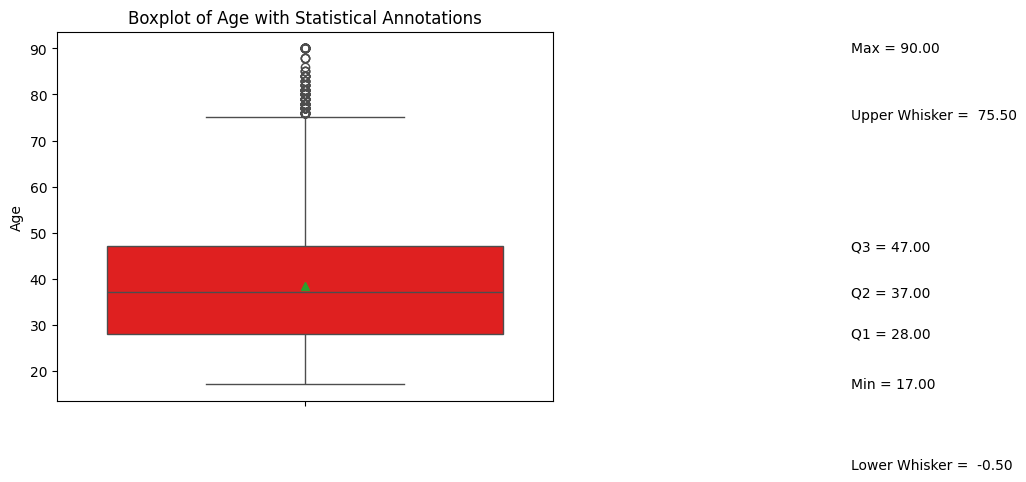

In [13]:
sns.boxplot(y=df['Age'], color='r', showmeans=True)
Q1 = np.percentile(df['Age'], 25)
Q2 = np.percentile(df['Age'], 50)
Q3 = np.percentile(df['Age'], 75)
minimum = df['Age'].min()
maximum = df['Age'].max()

upper_whisker = Q3 + 1.5 * (Q3 - Q1)
lower_whisker = Q1 - 1.5 * (Q3 - Q1)

outliers = boxplot_stats(df['Age'])[0]['fliers']

plt.text(1.1, Q1, f"Q1 = {Q1:.2f}", va="center")
plt.text(1.1, Q2, f"Q2 = {Q2:.2f}", va="center")
plt.text(1.1, Q3, f"Q3 = {Q3:.2f}", va="center")
plt.text(1.1, upper_whisker, f"Upper Whisker =  {upper_whisker:.2f}", va="center")
plt.text(1.1, lower_whisker, f"Lower Whisker =  {lower_whisker:.2f}",va="center")
plt.text(1.1, minimum, f"Min = {minimum:.2f}", va="center")
plt.text(1.1, maximum, f"Max = {maximum:.2f}", va="center")
plt.title("Boxplot of Age with Statistical Annotations")
plt.show()


In [14]:
print("Number of people above age 78:",len(df[df['Age']>upper_whisker]['Age']))

Number of people above age 78: 169


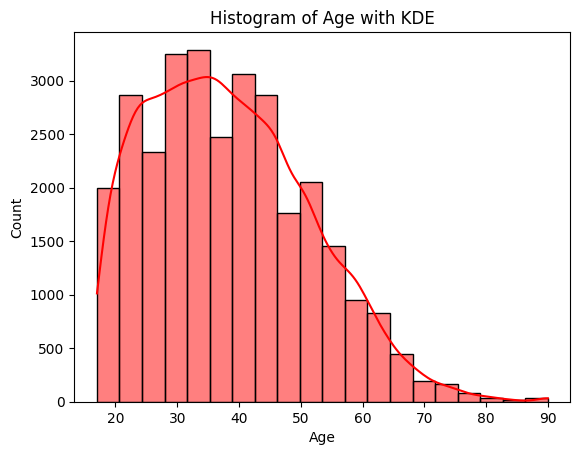

In [15]:
sns.histplot(df['Age'], kde=True, color='r',bins=20)
plt.title("Histogram of Age with KDE")
plt.show()

* The datapoints above 78 is still justifiable as the max value for age is 90 and falls under realistic  human limits

##### Analysis for identification of outliers on 'Hours_per_week' column

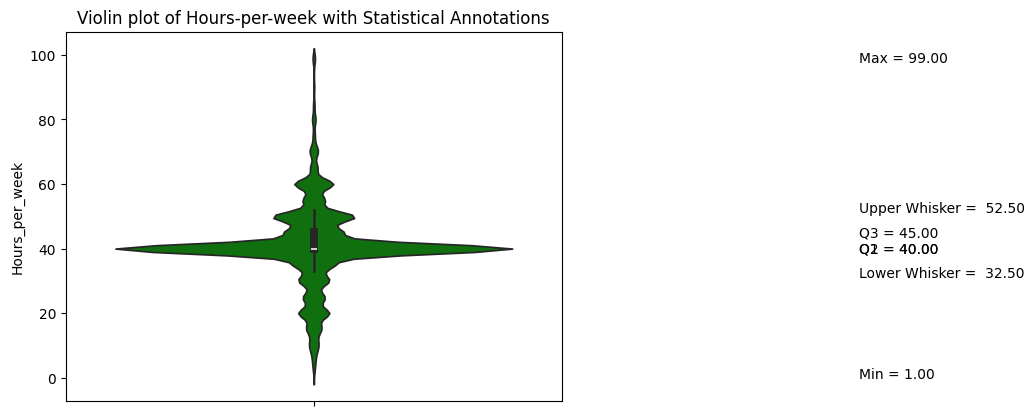

In [16]:
sns.violinplot(y=df['Hours_per_week'], color='g')
Q1 = np.percentile(df['Hours_per_week'], 25)
Q2 = np.percentile(df['Hours_per_week'], 50)
Q3 = np.percentile(df['Hours_per_week'], 75)
minimum = df['Hours_per_week'].min()
maximum = df['Hours_per_week'].max()

upper_whisker = Q3 + 1.5 * (Q3 - Q1)
lower_whisker = Q1 - 1.5 * (Q3 - Q1)
plt.text(1.1, Q1, f"Q1 = {Q1:.2f}", va="center")
plt.text(1.1, Q2, f"Q2 = {Q2:.2f}", va="center")
plt.text(1.1, Q3, f"Q3 = {Q3:.2f}", va="center")
plt.text(1.1, upper_whisker, f"Upper Whisker =  {upper_whisker:.2f}", va="center")
plt.text(1.1, lower_whisker, f"Lower Whisker =  {lower_whisker:.2f}", va="center")
plt.text(1.1, minimum, f"Min = {minimum:.2f}", va="center")
plt.text(1.1, maximum, f"Max = {maximum:.2f}", va="center")
plt.title("Violin plot of Hours-per-week with Statistical Annotations")
plt.show()


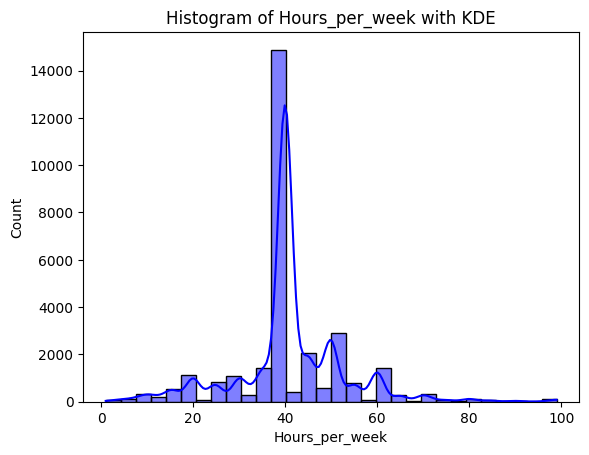

In [17]:
sns.histplot(df['Hours_per_week'], kde=True, color='b',bins=30)
plt.title("Histogram of Hours_per_week with KDE")
plt.show()

* Maximum number of hours worked per week is 99

* Minimum number of hours worked per week is 1

* The violin plot shows third quartile(Q3) as 52.50 ~ 53 hours per week.
  - if we consider 6 working days then each day will have approximatly 9 working hours.
  - if we consider 5 working days then each day will have approximatly 11 working hours.

* Let us consider they are 6 working days in a week and daily 12 hours of working hours then total to 72 hours per week which is extreme and exhausting




In [18]:
print("Number of individuals who work more than 72 hours per week :",len(df[df['Hours_per_week']>72]))

Number of individuals who work more than 72 hours per week : 398


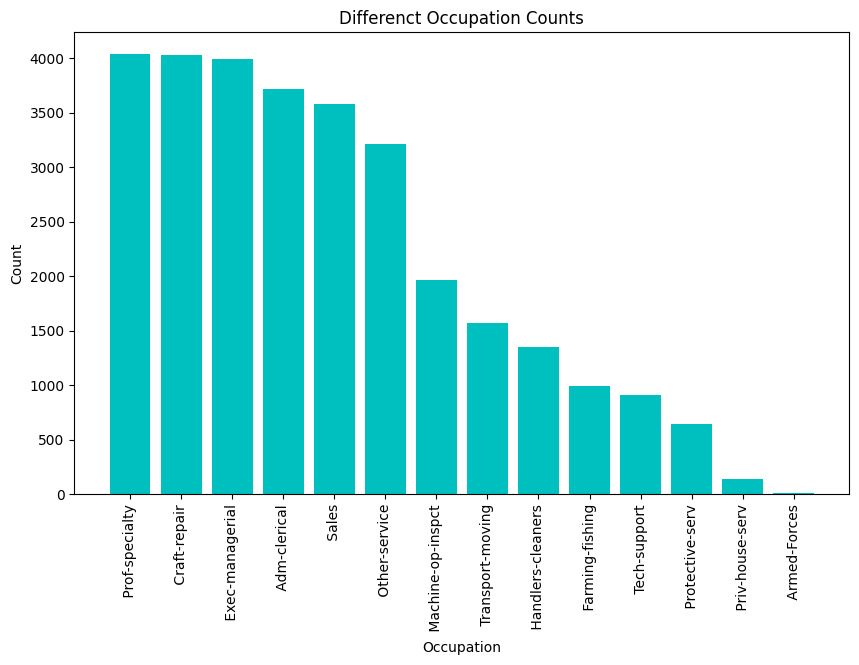

In [19]:
plt.figure(figsize=(10,6))
plt.bar(df['Occupation'].value_counts().index, df['Occupation'].value_counts().values, color='c')
plt.xticks(rotation=90)
plt.title("Differenct Occupation Counts")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

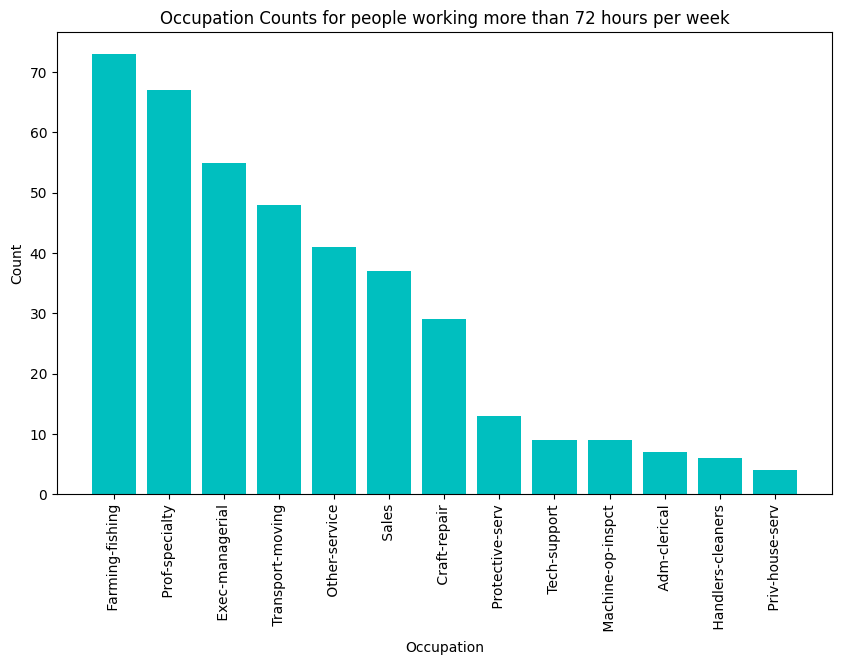

In [20]:
df_72 = df[df['Hours_per_week']>72]
plt.figure(figsize=(10,6))
plt.bar(df_72['Occupation'].value_counts().index, df_72['Occupation'].value_counts().values, color='c')
plt.xticks(rotation=90)
plt.title("Occupation Counts for people working more than 72 hours per week")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

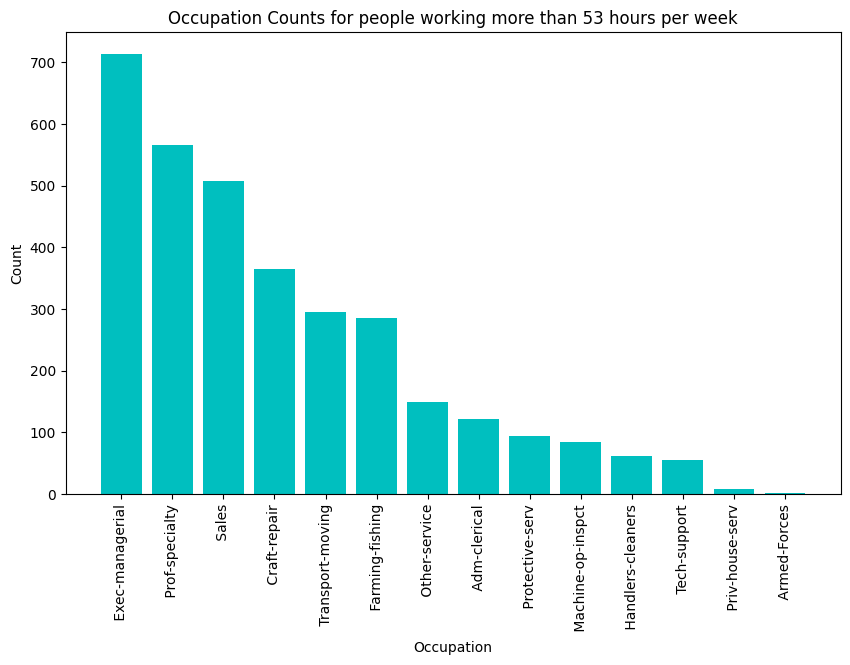

In [21]:
df_53 = df[df['Hours_per_week']>53]
plt.figure(figsize=(10,6))
plt.bar(df_53['Occupation'].value_counts().index, df_53['Occupation'].value_counts().values, color='c')
plt.xticks(rotation=90)
plt.title("Occupation Counts for people working more than 53 hours per week")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

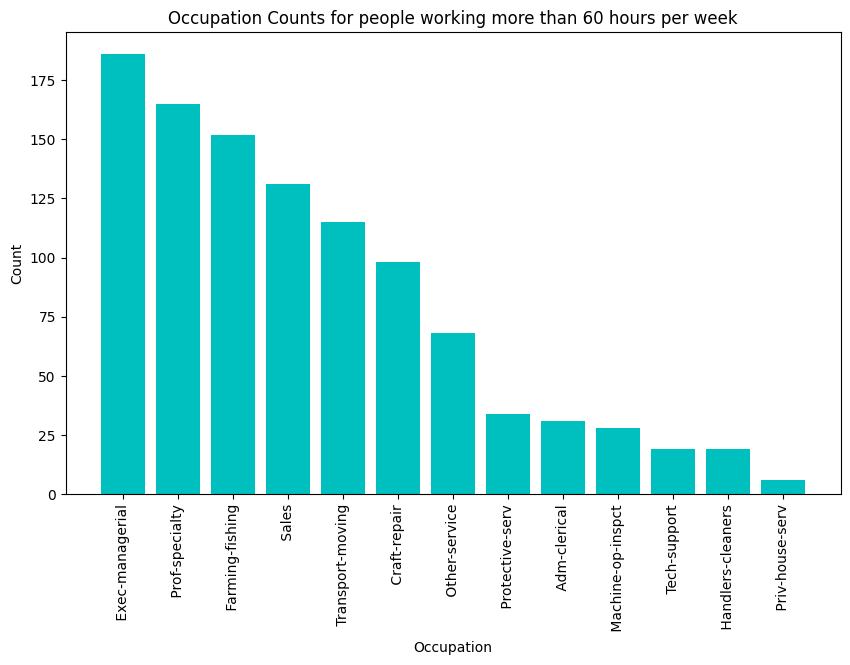

In [22]:
df_60 = df[df['Hours_per_week']>60]
plt.figure(figsize=(10,6))
plt.bar(df_60['Occupation'].value_counts().index, df_60['Occupation'].value_counts().values, color='c')
plt.xticks(rotation=90)
plt.title("Occupation Counts for people working more than 60 hours per week")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

In [23]:
print("Total number of population:",df.shape[0])
print("Number of people working more than 53 hours per week:",len(df_53),", i.e ",(len(df_53)/df.shape[0])*100,"% of total population")
print("Number of people working more than 60 hours per week:",len(df_60),", i.e ",(len(df_60)/df.shape[0])*100,"% of total population")
print("Number of people working more than 72 hours per week:",len(df_72),", i.e ",(len(df_72)/df.shape[0])*100,"% of total population")

Total number of population: 30162
Number of people working more than 53 hours per week: 3305 , i.e  10.957496187255487 % of total population
Number of people working more than 60 hours per week: 1052 , i.e  3.4878323718586297 % of total population
Number of people working more than 72 hours per week: 398 , i.e  1.31954114448644 % of total population


In [24]:
df = df[df['Hours_per_week']<=60]

* Removing the individuals who works more than 60 hours per week because its a small population(3.4%) of people compare to the total population of the data and removing such data will help us concenrate on majority population with clean insights. 

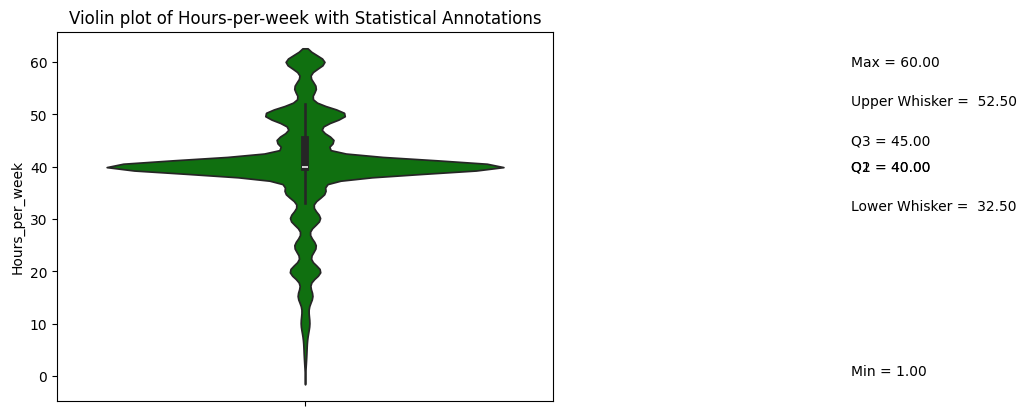

In [25]:
sns.violinplot(y=df['Hours_per_week'], color='g')
Q1 = np.percentile(df['Hours_per_week'], 25)
Q2 = np.percentile(df['Hours_per_week'], 50)
Q3 = np.percentile(df['Hours_per_week'], 75)
minimum = df['Hours_per_week'].min()
maximum = df['Hours_per_week'].max()

upper_whisker = Q3 + 1.5 * (Q3 - Q1)
lower_whisker = Q1 - 1.5 * (Q3 - Q1)
plt.text(1.1, Q1, f"Q1 = {Q1:.2f}", va="center")
plt.text(1.1, Q2, f"Q2 = {Q2:.2f}", va="center")
plt.text(1.1, Q3, f"Q3 = {Q3:.2f}", va="center")
plt.text(1.1, upper_whisker, f"Upper Whisker =  {upper_whisker:.2f}", va="center")
plt.text(1.1, lower_whisker, f"Lower Whisker =  {lower_whisker:.2f}", va="center")
plt.text(1.1, minimum, f"Min = {minimum:.2f}", va="center")
plt.text(1.1, maximum, f"Max = {maximum:.2f}", va="center")
plt.title("Violin plot of Hours-per-week with Statistical Annotations")
plt.show()


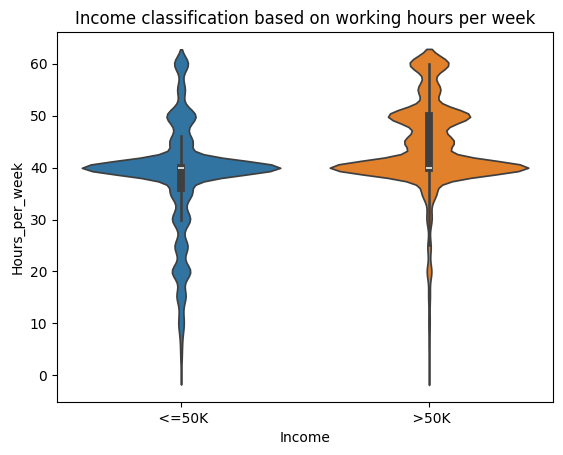

In [26]:
sns.violinplot(data=df,x = 'Income',y='Hours_per_week',hue='Income')
plt.title("Income classification based on working hours per week")
plt.show()

In [27]:
df_less_hrpwk = df[df['Hours_per_week']<9][['Hours_per_week','Income']]
df_less_hrpwk['Income'].value_counts()

Income
<=50K    248
>50K      24
Name: count, dtype: int64

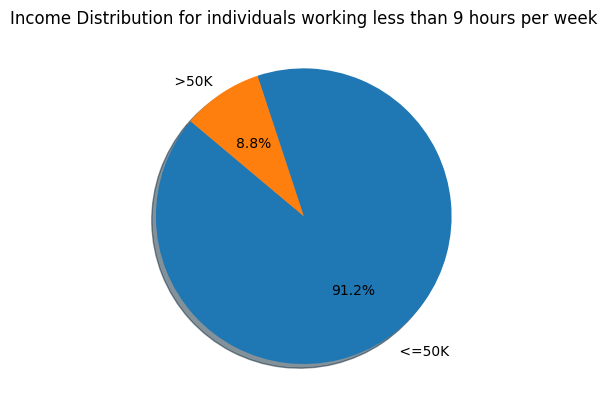

In [28]:
plt.pie(df_less_hrpwk['Income'].value_counts(),labels=df_less_hrpwk['Income'].value_counts().index,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("Income Distribution for individuals working less than 9 hours per week")
plt.show()

* No need to remove people whose hours_per_week is in single digit as there income shows less than $50k which is quite correct as "Less hours of work" = "Less Income"

##### Analysis for identification of outliers on 'Capital_gain' column

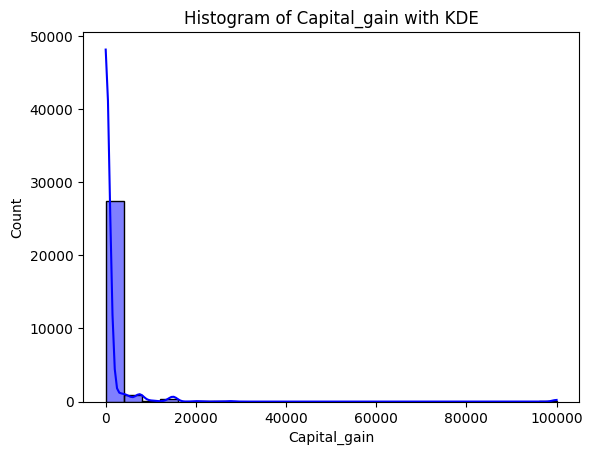

In [29]:
sns.histplot(df['Capital_gain'], kde=True, color='b',bins=25)
plt.title("Histogram of Capital_gain with KDE")
plt.show()

* The 'Capital_gain' column is highly skewed where frequency of Capital_gain is 0 approximately 90%.

* The value 99,999 often appears as a "top-code" or placeholder. Values above 10,000 are extremely rare.

* To reduce skewness we will use log-scaling. This preserves all the data but mitigates the influence of large value

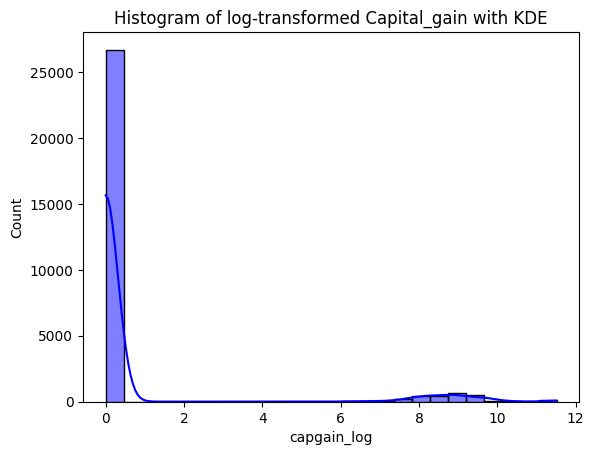

In [30]:
df['capgain_log'] = np.log1p(df['Capital_gain'])
sns.histplot(df['capgain_log'], kde=True, color='b',bins=25)
plt.title("Histogram of log-transformed Capital_gain with KDE")
plt.show()

##### Analysis for identification of outliers on 'Capital_loss' column

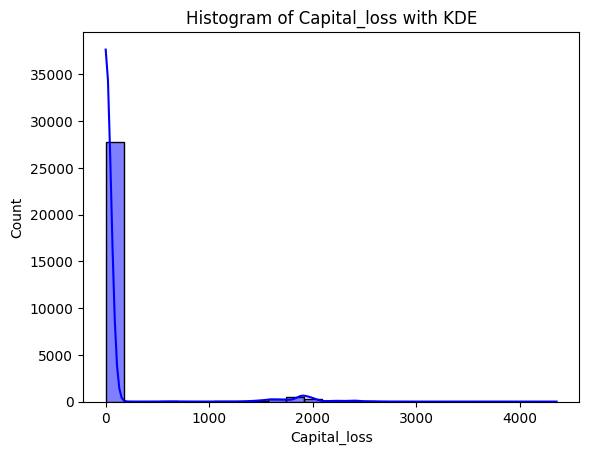

In [31]:
sns.histplot(df['Capital_loss'], kde=True, color='b',bins=25)
plt.title("Histogram of Capital_loss with KDE")
plt.show()

* The 'Capital_loss' column is highly skewed where frequency of Capital_loss is 0 approximately 90%.

* To reduce skewness we will use log-scaling. This preserves all the data but mitigates the influence of large value

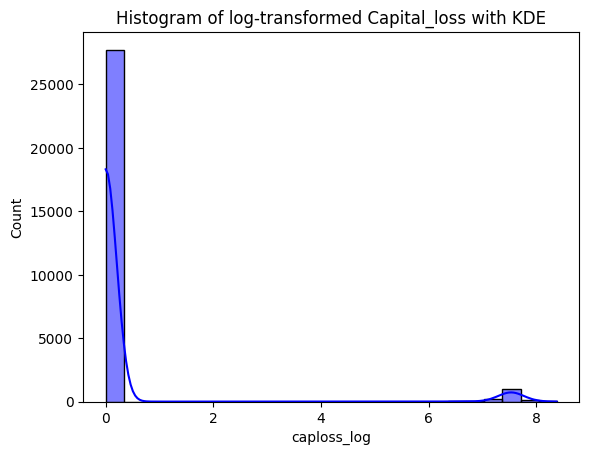

In [32]:
df['caploss_log'] = np.log1p(df['Capital_loss'])
sns.histplot(df['caploss_log'], kde=True, color='b',bins=25)
plt.title("Histogram of log-transformed Capital_loss with KDE")
plt.show()

### Normalize data

In [33]:
# Removing log-scaled Capital_gain and Capital_loss columns.

df.drop(columns=['caploss_log','capgain_log'],inplace=True)

In [34]:
#Normalizing numerical columns (Scaling and Standardizing)

# Columns with numerical/float data types
df[df.select_dtypes(include=['int64', 'float64','int32','float32']).columns]

,Age,fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


#### Removing irrelevant or redundant features and Scaling

In [35]:
# Removing irrelevant or redundant features.

df.drop(columns=['fnlwgt'],inplace=True)
df.head(5)

,Age,Workclass,Education,Education_num,Marital_status,Occupation,relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
df[df.select_dtypes(include=['int64', 'float64','int32','float32']).columns].head(5)

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [37]:
df.describe()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,29110.000000,29110.000000,29110.000000,29110.000000,29110.000000
mean,38.369426,10.106286,1017.665888,86.819340,39.724253
std,13.191723,2.537940,6935.469285,400.384017,10.154970
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,60.000000


In [38]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']])

In [39]:
# Normalized data

scaled_values

array([[ 0.04780153,  1.14020152,  0.16673046, -0.2168439 ,  0.02715438],
       [ 0.88167207,  1.14020152, -0.14673605, -0.2168439 , -2.63168789],
       [-0.02800488, -0.43590685, -0.14673605, -0.2168439 ,  0.02715438],
       ...,
       [ 1.48812338, -0.43590685, -0.14673605, -0.2168439 ,  0.02715438],
       [-1.24090749, -0.43590685, -0.14673605, -0.2168439 , -1.94235841],
       [ 1.0332849 , -0.43590685,  2.01955688, -0.2168439 ,  0.02715438]],
      shape=(29110, 5))

### Converting categorical features into numerical formats

In [40]:
# Preview of categorical columns

df[df.select_dtypes(include=['object']).columns]

,Workclass,Education,Marital_status,Occupation,relationship,Race,Sex,Native_country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


#### Encoding the categorical features (Ordinal Encoding , OneHotEncoding , LabelEncoding)

* Education feature is truly ordinal (Preschool < Doctorate) and the dataset even provides an "Education_num" column. We should preserve this order.

* Here we can map each level to an integer in ascending order. This respects the natural ranking.

* This encoding is safe for linear and tree models because the order is real.

##### Education

In [41]:
edu_order = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th',
             '11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm',
             'Bachelors','Masters','Prof-school','Doctorate']
df['Education'] = df['Education'].str.strip()
df['Education'] = pd.Categorical(df['Education'], categories=edu_order, ordered=True)
df['Education_code'] = df['Education'].cat.codes
df['Education_code'].to_csv('Encoding_dataset/education.csv')


In [42]:
df['Education_code'].value_counts()

Education_code
8     9509
9     6471
12    4876
13    1545
10    1271
6     1024
11     980
5      792
3      531
14     486
4      445
7      371
15     340
2      282
1      144
0       43
Name: count, dtype: int64

In [43]:
df['Education'].value_counts()

Education
HS-grad         9509
Some-college    6471
Bachelors       4876
Masters         1545
Assoc-voc       1271
11th            1024
Assoc-acdm       980
10th             792
7th-8th          531
Prof-school      486
9th              445
12th             371
Doctorate        340
5th-6th          282
1st-4th          144
Preschool         43
Name: count, dtype: int64

In [44]:
df[['Education','Education_code']].head(10)

,Education,Education_code
0,Bachelors,12
1,Bachelors,12
2,HS-grad,8
3,11th,6
4,Bachelors,12
5,Masters,13
6,9th,4
7,HS-grad,8
8,Masters,13
9,Bachelors,12


##### Workclass

In [45]:
# Encoding Workclass column using OneHotEncoder

ohe = OneHotEncoder()
workclass_encoded = ohe.fit_transform(df[['Workclass']])
workclass = pd.DataFrame(workclass_encoded.toarray(), columns=ohe.get_feature_names_out(['Workclass']))
df_encoded = pd.concat([df, workclass],axis=1)
df_encoded.drop(columns=['Workclass'],axis=1,inplace=True)
df_encoded.drop(columns=['Education','Education_num'],inplace=True)
workclass.to_csv('Encoding_dataset/workclass.csv')
workclass


,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29105,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29106,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29107,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29108,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
workclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29110 entries, 0 to 29109
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Workclass_ Federal-gov       29110 non-null  float64
 1   Workclass_ Local-gov         29110 non-null  float64
 2   Workclass_ Private           29110 non-null  float64
 3   Workclass_ Self-emp-inc      29110 non-null  float64
 4   Workclass_ Self-emp-not-inc  29110 non-null  float64
 5   Workclass_ State-gov         29110 non-null  float64
 6   Workclass_ Without-pay       29110 non-null  float64
dtypes: float64(7)
memory usage: 1.6 MB


In [47]:
# checking Nan values

nan_cols = workclass.columns[workclass.isna().any()]
workclass[nan_cols][workclass[nan_cols].isna().any(axis=1)]


""


##### Occupation

In [48]:
# Encoding Occupation column using OneHotEncoder

ohe = OneHotEncoder()
occupation_encoded = ohe.fit_transform(df[['Occupation']])
Occupation = pd.DataFrame(occupation_encoded.toarray(), columns=ohe.get_feature_names_out(['Occupation']))
df_encoded = pd.concat([df_encoded, Occupation],axis=1)
df_encoded.drop(columns=['Occupation'],axis=1,inplace=True)
Occupation.to_csv('Encoding_dataset/occupation.csv')
Occupation

,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Marital Status

In [49]:
# Encoding Marital_Status column using OneHotEncoder

ohe = OneHotEncoder()
marital_encoded = ohe.fit_transform(df[['Marital_status']])
marital_status = pd.DataFrame(marital_encoded.toarray(), columns=ohe.get_feature_names_out(['Marital_status']))
df_encoded = pd.concat([df_encoded, marital_status],axis=1)
df_encoded.drop(columns=['Marital_status'],axis=1,inplace=True)
marital_status.to_csv('Encoding_dataset/marital_status.csv')
marital_status

,Marital_status_ Divorced,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29105,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29106,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29107,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29108,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##### Relationship

In [50]:
# Encoding Relationship column using OneHotEncoder

ohe = OneHotEncoder()
relation_encoded = ohe.fit_transform(df[['relationship']])
relationship = pd.DataFrame(relation_encoded.toarray(), columns=ohe.get_feature_names_out(['relationship']))
df_encoded = pd.concat([df_encoded, relationship],axis=1)
df_encoded.drop(columns=['relationship'],axis=1,inplace=True)
relationship.to_csv('Encoding_dataset/relationship.csv')
relationship

,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
29105,0.0,0.0,0.0,0.0,0.0,1.0
29106,1.0,0.0,0.0,0.0,0.0,0.0
29107,0.0,0.0,0.0,0.0,1.0,0.0
29108,0.0,0.0,0.0,1.0,0.0,0.0


##### Race

In [51]:
# Encoding Race column using OneHotEncoder

ohe = OneHotEncoder()
race_encoded = ohe.fit_transform(df[['Race']])
race = pd.DataFrame(race_encoded.toarray(), columns=ohe.get_feature_names_out(['Race']))
df_encoded = pd.concat([df_encoded, race],axis=1)
df_encoded.drop(columns=['Race'],axis=1,inplace=True)
race.to_csv('Encoding_dataset/race.csv')
race

,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
29105,0.0,0.0,0.0,0.0,1.0
29106,0.0,0.0,0.0,0.0,1.0
29107,0.0,0.0,0.0,0.0,1.0
29108,0.0,0.0,0.0,0.0,1.0


##### Native_Country

In [52]:
# Encoding Native_Country column using OneHotEncoder

ohe = OneHotEncoder()
nc_encoded = ohe.fit_transform(df[['Native_country']])
Native_country = pd.DataFrame(nc_encoded.toarray(), columns=ohe.get_feature_names_out(['Native_country']))
df_encoded = pd.concat([df_encoded, Native_country],axis=1)
df_encoded.drop(columns=['Native_country'],axis=1,inplace=True)
Native_country.to_csv('Encoding_dataset/native_country.csv')

##### Income and Sex

In [53]:
# Encoding Income and Sex columns using LabelEncoder

lable_enc = LabelEncoder()
df['Income_enc'] = lable_enc.fit_transform(df['Income'])
df['Sex_enc'] = lable_enc.fit_transform(df['Sex'])
df_encoded['Income'] = df['Income_enc']
df_encoded['Sex'] = df['Sex_enc']
df['Income_enc'].to_csv('Encoding_dataset/income.csv')
df['Sex_enc'].to_csv('Encoding_dataset/Sex.csv')
# df.drop(columns=['Income_enc','Sex_enc'],inplace=True)
# df_encoded.info(0)

In [54]:
df['Income_enc']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income_enc, Length: 29110, dtype: int64

In [55]:
df['Sex_enc']

0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: Sex_enc, Length: 29110, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29110 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             29110 non-null  int64   
 1   Workclass       29110 non-null  object  
 2   Education       29110 non-null  category
 3   Education_num   29110 non-null  int64   
 4   Marital_status  29110 non-null  object  
 5   Occupation      29110 non-null  object  
 6   relationship    29110 non-null  object  
 7   Race            29110 non-null  object  
 8   Sex             29110 non-null  object  
 9   Capital_gain    29110 non-null  int64   
 10  Capital_loss    29110 non-null  int64   
 11  Hours_per_week  29110 non-null  int64   
 12  Native_country  29110 non-null  object  
 13  Income          29110 non-null  object  
 14  Education_code  29110 non-null  int8    
 15  Income_enc      29110 non-null  int64   
 16  Sex_enc         29110 non-null  int64   
dtypes: category(1), i

### Concatinating numerical and encoded categorical features to make a final numerical dataset

In [57]:
final_df = pd.concat([
    df['Age'].reset_index(drop=True),
    workclass.reset_index(drop=True),
    df['Education_code'].reset_index(drop=True),
    marital_status.reset_index(drop=True),
    Occupation.reset_index(drop=True),
    relationship.reset_index(drop=True),
    race.reset_index(drop=True),
    df[['Capital_gain','Capital_loss','Hours_per_week']].reset_index(drop=True),
    Native_country.reset_index(drop=True),
    df['Income_enc'].reset_index(drop=True)
], axis=1)
final_df

,Age,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_code,Marital_status_ Divorced,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Income_enc
0,39,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,38,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29105,27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
29106,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
29107,58,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
29108,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [58]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29110 entries, 0 to 29109
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         29110 non-null  int64  
 1   Workclass_ Federal-gov                      29110 non-null  float64
 2   Workclass_ Local-gov                        29110 non-null  float64
 3   Workclass_ Private                          29110 non-null  float64
 4   Workclass_ Self-emp-inc                     29110 non-null  float64
 5   Workclass_ Self-emp-not-inc                 29110 non-null  float64
 6   Workclass_ State-gov                        29110 non-null  float64
 7   Workclass_ Without-pay                      29110 non-null  float64
 8   Education_code                              29110 non-null  int8   
 9   Marital_status_ Divorced                    29110 non-null  float64
 10  Marital_st

In [59]:
# checking Nan values

nan_cols = final_df.columns[final_df.isna().any()]
final_df[nan_cols][final_df[nan_cols].isna().any(axis=1)]


""


In [60]:
for col in final_df.columns:
    if final_df[col].dtype == 'float64':
        final_df[col] = final_df[col].astype('float32')
for col in final_df.columns:
    if final_df[col].dtype == 'int64':
        final_df[col] = final_df[col].astype('int32')

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29110 entries, 0 to 29109
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         29110 non-null  int32  
 1   Workclass_ Federal-gov                      29110 non-null  float32
 2   Workclass_ Local-gov                        29110 non-null  float32
 3   Workclass_ Private                          29110 non-null  float32
 4   Workclass_ Self-emp-inc                     29110 non-null  float32
 5   Workclass_ Self-emp-not-inc                 29110 non-null  float32
 6   Workclass_ State-gov                        29110 non-null  float32
 7   Workclass_ Without-pay                      29110 non-null  float32
 8   Education_code                              29110 non-null  int8   
 9   Marital_status_ Divorced                    29110 non-null  float32
 10  Marital_st

In [62]:
final_df.to_csv('final_encoded_dataset.csv')

# Task: 2 (Normalization)

## * Check the Normalize data section for flow and code 

#### How Normalization Affects the Data
* Puts all features on a similar scale, so no column dominates just because it has larger numbers.
* Makes models that use distance (like KNN) more fair, since every feature contributes equally.
* Helps models that use gradient updates (like logistic regression) to train faster and more smoothly.
* Doesn’t remove outliers but reduces the effect of very large values.
* Makes coefficients easier to compare in linear models.

#### Why StandardScaler is a Good Choice
* It makes each column have average = 0 and spread = 1, which works well for data that is roughly bell-shaped (like Age or Hours per week).
* Unlike MinMax scaling, it doesn’t squeeze all values into [0,1], so big jumps in values (like Capital Gain or Loss) still show up clearly.
* Keeps important differences around the average without flattening them too much.
* Many models expect data to be roughly standardized, so this method fits well.
* It handles skewed features better than MinMax, especially when there are a few extreme values.

# Task 3

Data Cleaning Report for Adult Income Dataset
1. Introduction

The Adult Income dataset, obtained from the UCI Machine Learning Repository, is widely used to predict whether an individual earns more than $50K annually based on demographic and employment attributes. The dataset contains both numerical and categorical features. However, like many real-world datasets, it contains missing values, inconsistencies, and potential outliers that need to be handled before analysis and modeling.

This report summarizes the steps followed during the data cleaning process, the reasoning behind each decision, challenges faced, and the overall impact on data quality.

⸻
2. Data Cleaning Steps and Rationale
2.1 Handling Missing Values

	•	The dataset does not explicitly use NaN for missing values but instead records "?" in some categorical features (e.g., workclass, occupation, and native-country).

	•	These were first identified and replaced with actual NaN values to make them easier to process.

	•	For imputation:

	•	If a categorical column had only a small percentage of missing values, rows containing them were dropped to avoid adding noise.

	•	If the missing rate was higher, mode imputation (filling with the most frequent category) was applied.
Rationale: Dropping a few rows with missing values avoids introducing biased guesses, while mode imputation ensures columns remain complete when missing data is more frequent.

⸻
2.2 Treating Inconsistent Data

	•	Columns such as workclass, occupation, and native-country contained leading/trailing spaces in category names.

	•	All categorical entries were stripped of spaces and standardized to lowercase for consistency.
Rationale: Inconsistent category names can create duplicate classes during encoding, leading to data leakage and incorrect analysis.

⸻
2.3 Outlier Detection and Treatment

Numerical columns (age, education_num, capital_gain, capital_loss, hours_per_week) were carefully examined.

	•	Age: The range was 17 to 90. Since ages beyond 90 are unrealistic for active employment, values above 90 were treated as outliers. These were removed.

	•	Education_num: This feature is already an ordered integer scale (1–16) with no outliers.

	•	Capital_gain / Capital_loss: Both columns had a highly skewed distribution, with most entries being zero. A few extreme values (e.g., capital_gain = 99999) were retained but noted as outliers that might affect certain models. Instead of removing them, log transformation was applied later during feature engineering.

	•	Hours_per_week: Values above 100 were considered unrealistic and capped at 100.
Rationale: Removing or capping unrealistic values avoids model bias and ensures predictions reflect realistic patterns. For skewed financial columns, transformation is preferred over deletion since extreme values can still carry important information.

⸻
2.4 Encoding Categorical Features

Categorical columns such as workclass, marital_status, occupation, relationship, race, sex, and native_country were converted into numerical format.

	•	One-hot encoding was used for most features, as it avoids imposing artificial order. This was especially useful for linear models like logistic regression.

	•	Label encoding was tested for tree-based models, since these models can handle categorical order internally.
Rationale: Encoding ensures categorical features can be used in classification algorithms. One-hot encoding prevents false assumptions about order in non-ordinal data, while label encoding keeps tree-based models efficient.

⸻
2.5 Scaling Numerical Features

	•	Columns age, education_num, capital_gain, capital_loss, and hours_per_week were scaled using StandardScaler.

	•	This transformed values to have a mean of 0 and standard deviation of 1.
Rationale: Standard scaling ensures that all features contribute equally, avoids dominance of large-scale features, and speeds up model convergence. It also preserves variation better than MinMax scaling in the presence of outliers.

⸻
3. Challenges and Resolutions

	1.	Hidden Missing Values:

	•	The dataset did not contain NaN directly but used "?" for missing entries.

	•	Solution: These placeholders were systematically replaced with NaN and then imputed.

	2.	Highly Skewed Financial Columns:

	•	Capital gain and loss had extreme right skew.

	•	Solution: Instead of deleting rows, log transformation was applied to reduce skew while keeping information.

	3.	Outliers in Hours_per_week:

	•	Some individuals had hours recorded as above 100, which is unrealistic.

	•	Solution: Values were capped at 100 rather than removed, to retain rows but reduce distortion.

	4.	Balancing Encoding Methods:

	•	One-hot encoding created many new columns, making the dataset larger.

	•	Solution: One-hot encoding was applied when using linear models, while label encoding was used for tree-based models to maintain efficiency.

⸻
4. Insights Gained from Data Cleaning

	•	The majority of individuals report no capital gain or loss, making these features very sparse. They might add limited predictive power without transformations.

	•	Education and hours per week had a strong influence on income level and required careful scaling.

	•	Workclass and occupation had the highest percentage of missing or inconsistent entries, which highlighted real-world issues in self-reported datasets.

	•	Standardizing text categories revealed that minor formatting errors (like spaces) could split a single category into multiple false categories, which can heavily affect results if not corrected.

⸻
5. Impact of Cleaning on Dataset Quality

	•	Row Deletion: Less than 2% of rows were removed due to missing values in workclass, occupation, and native-country. The loss was minimal and did not affect class balance.

	•	Imputation: Mode imputation was used for a few categorical features. While this introduces some bias, the effect was limited due to the low proportion of missing data.

	•	Outlier Handling: About 0.5% of records were adjusted or capped (e.g., hours >100). No major portion of the dataset was lost.

	•	Transformation: Log scaling of capital gain/loss made their distribution more manageable, improving model stability.

Overall, the dataset retained over 97% of original records, ensuring that the cleaning process improved reliability without significant data loss.
 